In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('./iris/iris.data', header=None)
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
print(df.head())

   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [4]:
correlation_matrix = df.drop(['class'], axis=1).corr()
print(f"Матрица корреляции для всей таблицы:")
print(correlation_matrix)

Матрица корреляции для всей таблицы:
              sepal length  sepal width  petal length  petal width
sepal length      1.000000    -0.109369      0.871754     0.817954
sepal width      -0.109369     1.000000     -0.420516    -0.356544
petal length      0.871754    -0.420516      1.000000     0.962757
petal width       0.817954    -0.356544      0.962757     1.000000


In [5]:
grouped_data = df.groupby('class')
for name, group in grouped_data:
    correlation_matrix_class = group.drop('class', axis=1).corr()
    print(f"Матрица корреляции для класса '{name}':")
    print(correlation_matrix_class)
    print()

Матрица корреляции для класса 'Iris-setosa':
              sepal length  sepal width  petal length  petal width
sepal length      1.000000     0.746780      0.263874     0.279092
sepal width       0.746780     1.000000      0.176695     0.279973
petal length      0.263874     0.176695      1.000000     0.306308
petal width       0.279092     0.279973      0.306308     1.000000

Матрица корреляции для класса 'Iris-versicolor':
              sepal length  sepal width  petal length  petal width
sepal length      1.000000     0.525911      0.754049     0.546461
sepal width       0.525911     1.000000      0.560522     0.663999
petal length      0.754049     0.560522      1.000000     0.786668
petal width       0.546461     0.663999      0.786668     1.000000

Матрица корреляции для класса 'Iris-virginica':
              sepal length  sepal width  petal length  petal width
sepal length      1.000000     0.457228      0.864225     0.281108
sepal width       0.457228     1.000000      0.40104

In [6]:
colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
for key in colors:
    print(f'{key}: {colors[key]}')

Iris-setosa: red
Iris-versicolor: green
Iris-virginica: blue


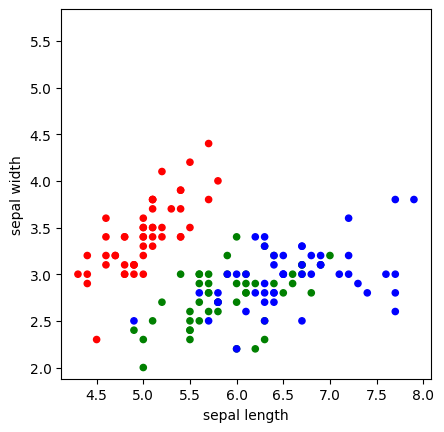

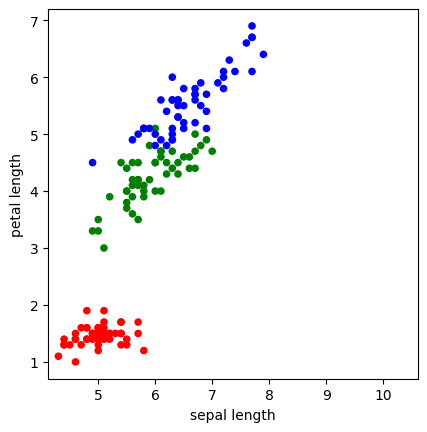

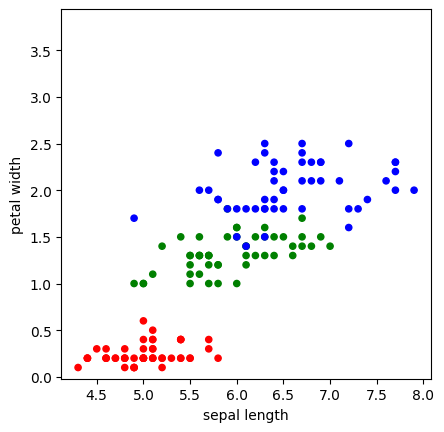

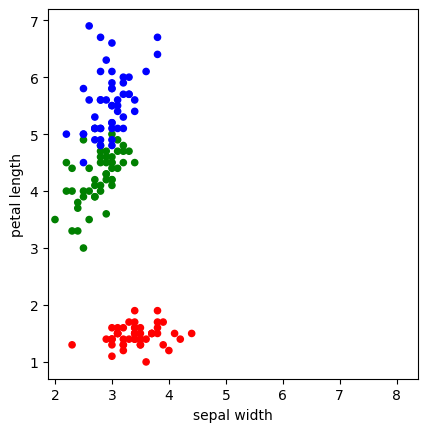

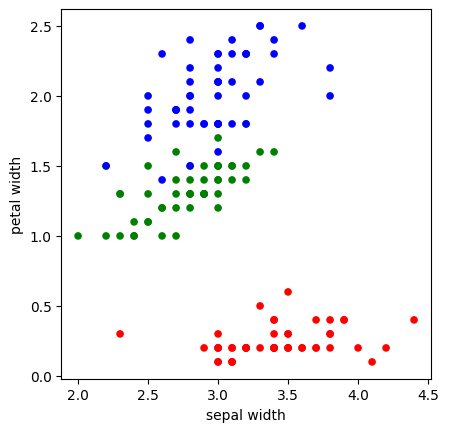

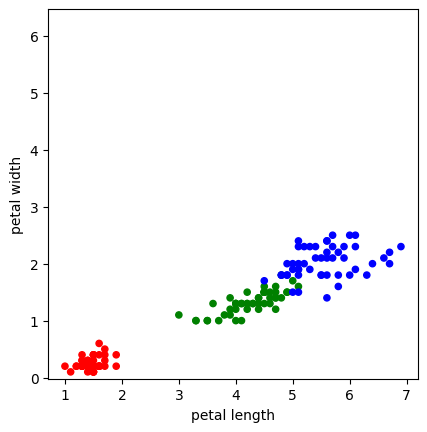

In [36]:
df.plot.scatter(x="sepal length", y="sepal width", c=df['class'].map(colors))
plt.axis('square')
df.plot.scatter(x="sepal length", y="petal length", c=df['class'].map(colors))
plt.axis('square')
df.plot.scatter(x="sepal length", y="petal width", c=df['class'].map(colors))
plt.axis('square')
df.plot.scatter(x="sepal width", y="petal length", c=df['class'].map(colors))
plt.axis('square')
df.plot.scatter(x="sepal width", y="petal width", c=df['class'].map(colors))
plt.axis('square')
df.plot.scatter(x="petal length", y="petal width", c=df['class'].map(colors))
plt.axis('square')
plt.show()

In [164]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC

In [261]:
new_df = df[['petal length', 'petal width', 'class']]
X = new_df.drop('class', axis=1).to_numpy()
print(X)
Y = new_df['class'].to_numpy()

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.1]
 [1.2 0.2]
 [1.3 0.2]
 [1.5 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

In [166]:
lda = LDA()
lda.fit(X, Y)
print(lda.coef_)

[[ -9.34569972 -13.26053051]
 [  2.62079274   0.37706628]
 [  6.72490698  12.88346423]]


In [239]:
levels = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

def plot_decision_boundaries(df, x, y, model, title):
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    mapped_colors = np.array([levels[c] for c in z])
    mapped_colors = mapped_colors.reshape(xx.shape)
    plt.contourf(xx, yy, mapped_colors, alpha=0.8)
    plt.scatter(x[:, 0], x[:, 1], c=df['class'].map(colors), edgecolors='k', marker='o')
    plt.title(title)

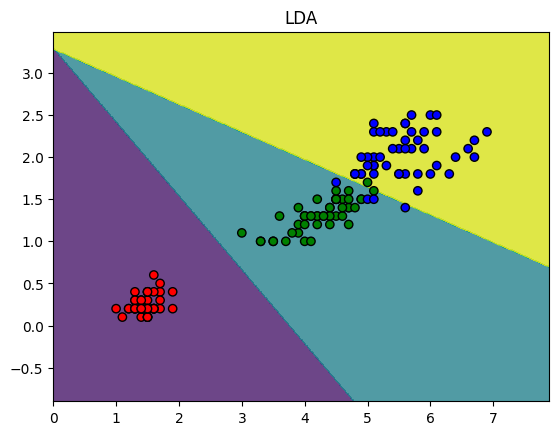

In [240]:
plot_decision_boundaries(df,X,Y,lda,"LDA")

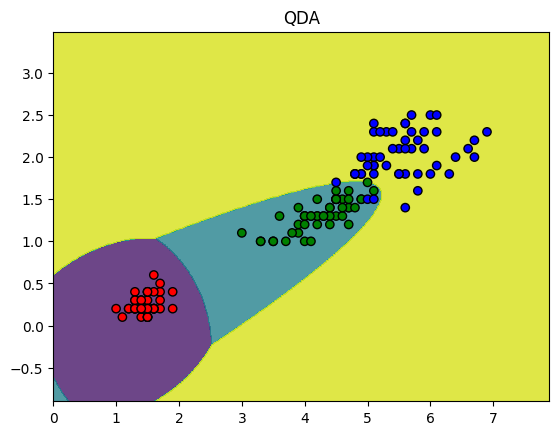

In [241]:
qda = QDA()
qda.fit(X, Y)
plot_decision_boundaries(df,X,Y,qda,"QDA")

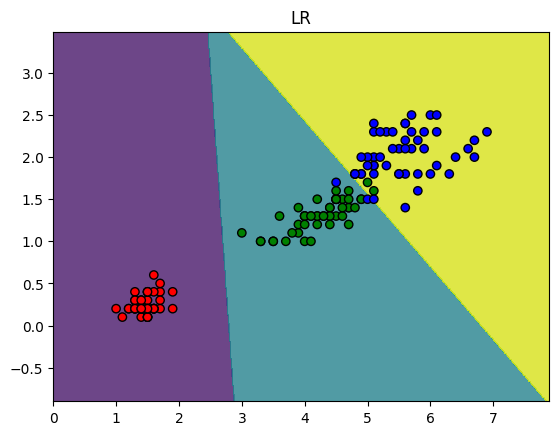

In [242]:
lr = LR()
lr.fit(X, Y)
plot_decision_boundaries(df,X,Y,lr,"LR")

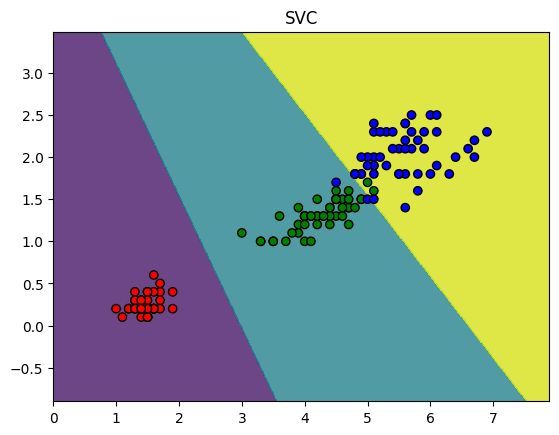

In [243]:
svc = SVC(kernel='linear')
svc.fit(X, Y)
plot_decision_boundaries(df,X,Y,svc,"SVC")

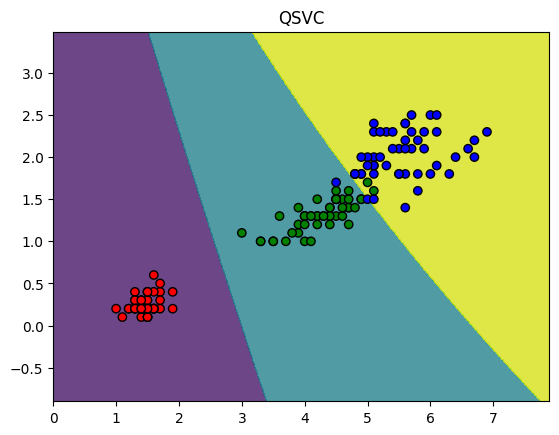

In [244]:
qsvc = SVC(kernel='poly', degree=2)
qsvc.fit(X, Y)
plot_decision_boundaries(df,X,Y,qsvc,"QSVC")

In [256]:
df_last = df[df["class"] != 'Iris-setosa']
Y_all = df_last['class'].to_numpy()

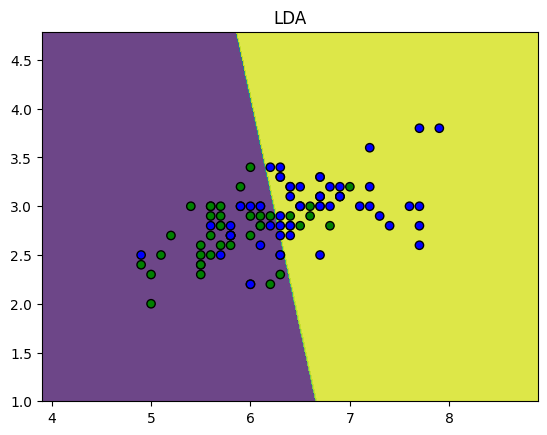

In [257]:
X_all = df_last[["sepal length", "sepal width"]].to_numpy()
lda0 = LDA()
lda0.fit(X_all, Y_all)
plot_decision_boundaries(df_last, X_all,Y_all,lda0,"LDA")

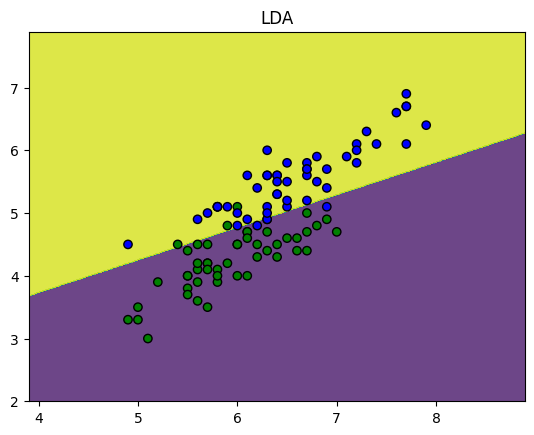

In [259]:
X_all = df_last[["sepal length", "petal length"]].to_numpy()
lda1 = LDA()
lda1.fit(X_all, Y_all)
plot_decision_boundaries(df_last, X_all,Y_all,lda1,"LDA")

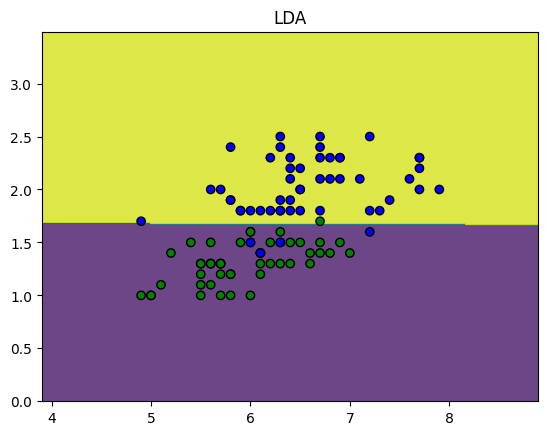

In [248]:
X_all = df_last[["sepal length", "petal width"]].to_numpy()
lda2 = LDA()
lda2.fit(X_all, Y_all)
plot_decision_boundaries(df_last,X_all,Y_all,lda2,"LDA")

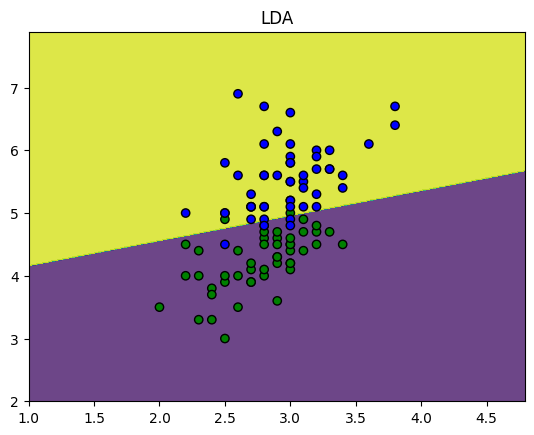

In [250]:
X_all = df_last[["sepal width", "petal length"]].to_numpy()
lda3 = LDA()
lda3.fit(X_all, Y_all)
plot_decision_boundaries(df_last,X_all,Y_all,lda3,"LDA")

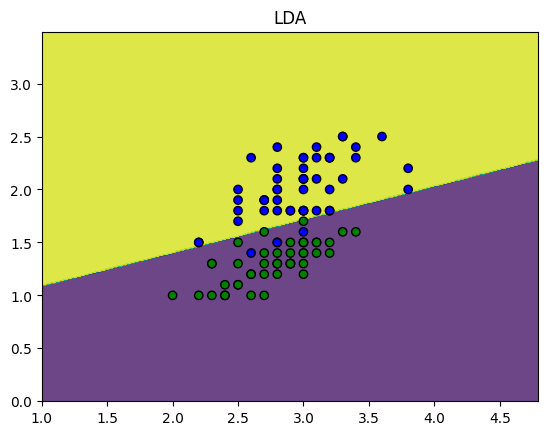

In [251]:
X_all = df_last[["sepal width", "petal width"]].to_numpy()
lda4 = LDA()
lda4.fit(X_all, Y_all)
plot_decision_boundaries(df_last,X_all,Y_all,lda4,"LDA")

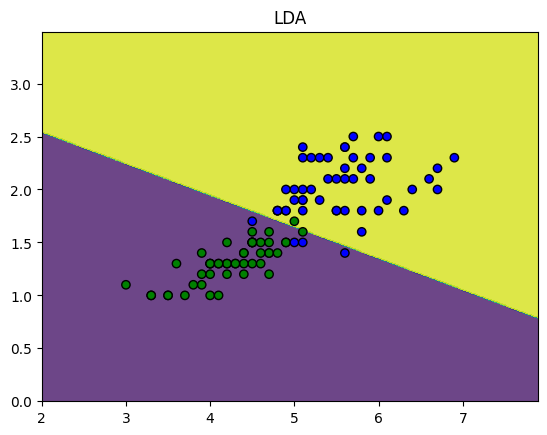

In [252]:
X_all = df_last[["petal length", "petal width"]].to_numpy()
lda5 = LDA()
lda5.fit(X_all, Y_all)
plot_decision_boundaries(df_last,X_all,Y_all,lda5,"LDA")